<a href="https://colab.research.google.com/github/fabiomartin5/Curso-de-Python-2024/blob/main/Introdu%C3%A7%C3%A3o_ao_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Regressão linear:**
Exemplo de entrada unidimensional

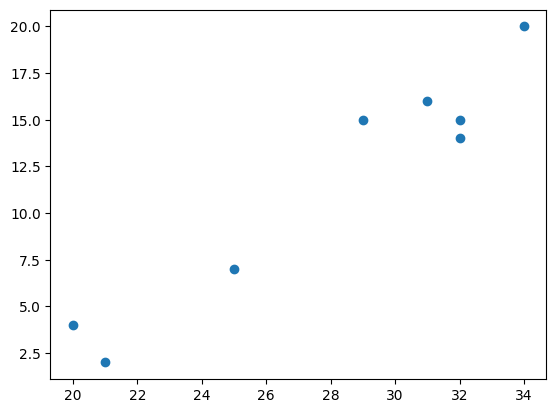

In [2]:
X = [[20], [21], [25], [29], [31], [32], [32], [34]] # temperaturas
Y = [   4,    2,    7,   15,   16,   14,   15,  20]  # clientes
plt.scatter(X, Y)

In [3]:
from sklearn import linear_model
regressao_linear = linear_model.LinearRegression()

regressao_linear.fit(X, Y)
a = regressao_linear.coef_
b = regressao_linear.intercept_
print(a, b)
# y = 1.16x - 20.85

[1.16] -20.85500000000001


In [4]:
X2 = [[40], [41], [18]]
regressao_linear.predict(X2).astype(int)

array([25, 26,  0])

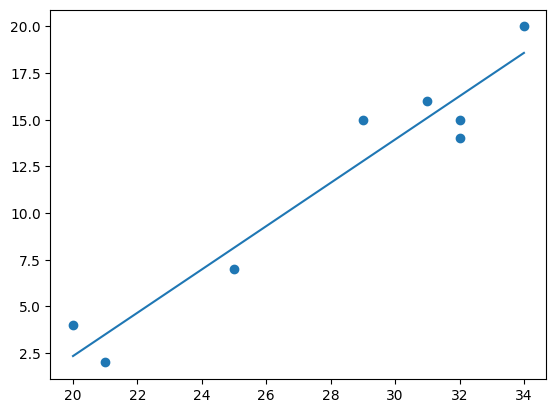

In [5]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, regressao_linear.predict(X))
plt.show()

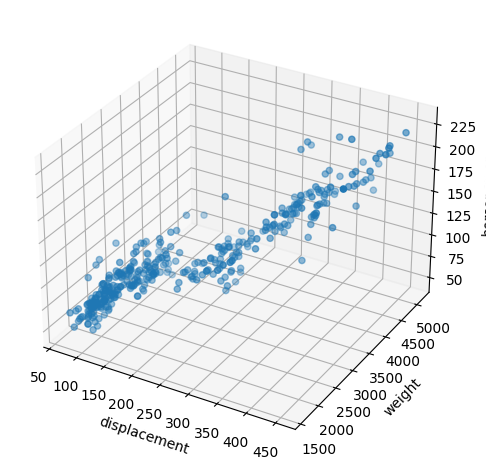

In [16]:
fig = plt.figure(layout='tight')
ax = fig.add_subplot(projection='3d')
mpg = sns.load_dataset('mpg').dropna() #Milhas por galão, uma medida de eficiência de combustível. Quanto maior o valor, mais eficiente é o carro.

ax.set_xlabel('displacement') #Capacidade volumétrica do motor (medida em polegadas cúbicas). Motores com maior deslocamento tendem a ser mais potentes, mas menos eficientes em termos de combustível.
ax.set_ylabel('weight') #Peso do carro (em libras)
ax.set_zlabel('horsepower') #Potência do motor (medida em cavalos-vapor, "horsepower").
ax.scatter(mpg['displacement'], mpg['weight'], mpg['horsepower'])


In [17]:
X = np.array(mpg[['displacement', 'weight']])
Y = np.array(mpg['horsepower'])

display(mpg[['displacement', 'weight']].head())
display(mpg['horsepower'].head())

displacement  weight
0         307.0    3504
1         350.0    3693
2         318.0    3436
3         304.0    3433
4         302.0    3449

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

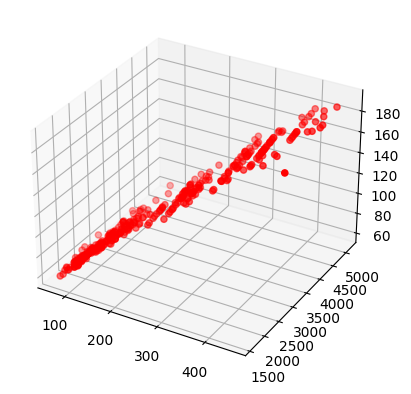

In [18]:
regressao_linear = linear_model.LinearRegression()
regressao_linear.fit(X, Y)
Y_previsto = regressao_linear.predict(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y_previsto, c='red')

**Classificação linear**

bill_depth_mm  body_mass_g
0           18.7       3750.0
1           17.4       3800.0
2           18.0       3250.0
4           19.3       3450.0
5           20.6       3650.0

0      Male
1    Female
2    Female
4    Female
5      Male
Name: sex, dtype: object

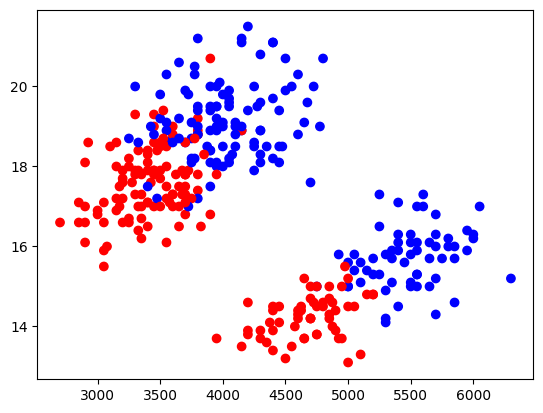

In [31]:
penguins = sns.load_dataset('penguins').dropna()
X = np.array(penguins[['bill_depth_mm', 'body_mass_g']]) # Lista de vetores [grossura_bico, peso]
Y = np.array(penguins['sex']) # Lista de categorias Macho / Fêmea

cores = ['red' if s == 'Female' else 'blue' for s in penguins['sex']]
plt.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
display(penguins[['bill_depth_mm', 'body_mass_g']].head())
display(penguins['sex'].head())

bill_depth_mm  body_mass_g
0           18.7       3750.0
1           17.4       3800.0
2           18.0       3250.0
4           19.3       3450.0
5           20.6       3650.0

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

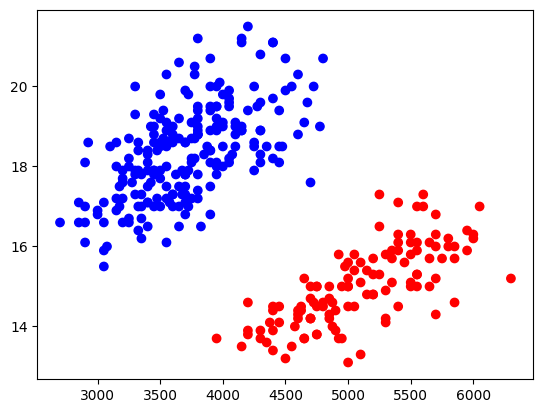

In [33]:
penguins = sns.load_dataset('penguins').dropna()
X = np.array(penguins[['bill_depth_mm', 'body_mass_g']]) # Lista de vetores [grossura_bico, peso]
Y = np.array(penguins['species']) # Lista de categorias Macho / Fêmea

cores = ['red' if s == 'Gentoo' else 'blue' for s in penguins['species']]
plt.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
display(penguins[['bill_depth_mm', 'body_mass_g']].head())
display(penguins['species'])

In [20]:
from sklearn import svm
classificador = svm.LinearSVC()

classificador.fit(X, Y)
taxa = classificador.score(X, Y)
print(f'Taxa de acerto: {round(100*taxa, 2)}%')

Taxa de acerto: 89.79%


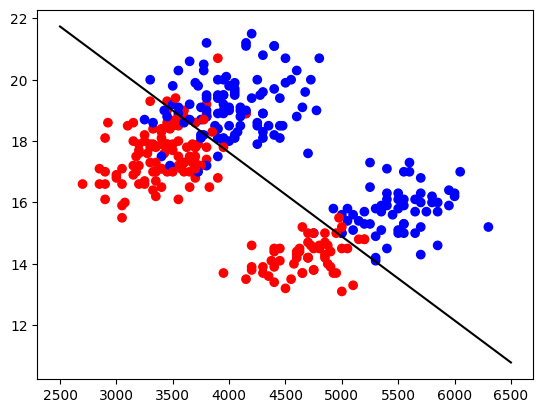

In [21]:
fig, ax = plt.subplots()
ax.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
w = classificador.coef_
b = classificador.intercept_
a = -(w[0][1]/w[0][0])
b = -b[0]/w[0][0]
ax.plot(np.linspace(2500, 6500, 100), a*np.linspace(2500, 6500, 100)+b, c='black')

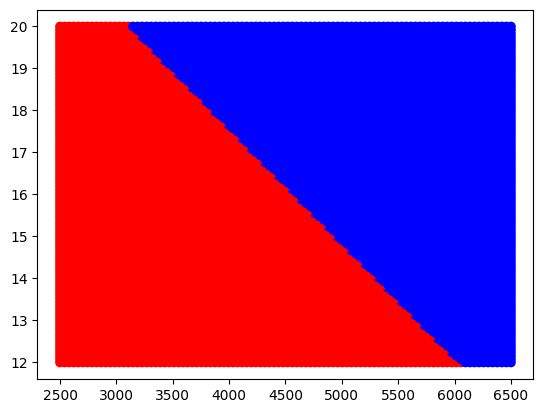

In [24]:
X1, X2 = np.meshgrid(np.linspace(2500, 6500, 100), np.linspace(12, 20, 100))
Y_previsto = classificador.predict(np.array([X2.ravel(), X1.ravel()]).T)


fig, ax = plt.subplots()
ax.scatter(X1, X2,c = ['red' if s =='Female' else 'blue' for s in Y_previsto])


**Kernels**

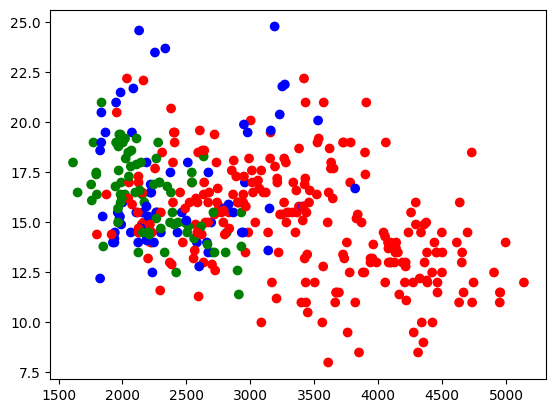

In [25]:
mpg = sns.load_dataset('mpg').dropna()
X = np.array(mpg[['weight', 'acceleration']])
Y = np.array(mpg['origin'])

cores = ['red' if s == 'usa' else s for s in mpg['origin']]
cores = ['blue' if s == 'europe' else s for s in cores]
cores = ['green' if s == 'japan' else s for s in cores]
plt.scatter(X[:,0], X[:,1], c = cores)

In [26]:
from sklearn import svm

classificador_linear = svm.SVC(kernel='linear')
classificador_linear.fit(X, Y)
taxa1 = classificador_linear.score(X, Y)

classificador_rbf = svm.SVC(kernel='rbf')
classificador_rbf.fit(X, Y)
taxa2 = classificador_rbf.score(X, Y)

print(f'Taxa de acerto (linear): {round(100*taxa1, 2)}%')
print(f'Taxa de acerto (rbf): {round(100*taxa2, 2)}%')

Taxa de acerto (linear): 67.86%
Taxa de acerto (rbf): 69.13%


**Clustering**
DBSCAN

In [35]:
!gdown 1WWJsFRPErzUWSzmbkyfaT7voJkrT8r0D

Downloading...
From: https://drive.google.com/uc?id=1WWJsFRPErzUWSzmbkyfaT7voJkrT8r0D
To: /content/pony.csv
100% 18.1k/18.1k [00:00<00:00, 48.5MB/s]


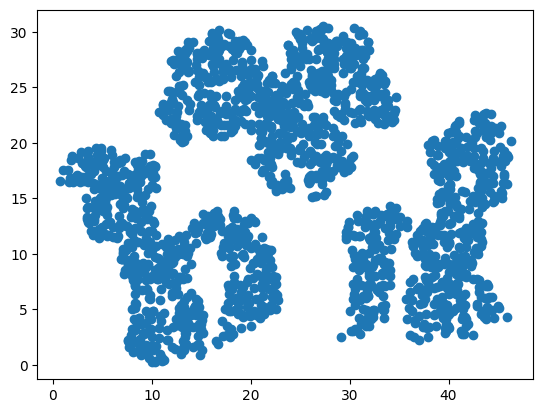

In [36]:
data = pd.read_csv('/content/pony.csv')
plt.scatter(data['X'], data['Y'])

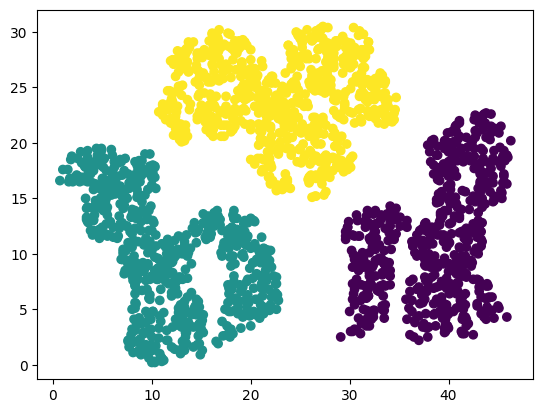

In [37]:
from sklearn import cluster
dbscan = cluster.DBSCAN(eps=2)
dbscan.fit(data[['X', 'Y']])

labels = dbscan.labels_

plt.scatter(data['X'], data['Y'], c=labels)
plt.show()